In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import datetime as dt

The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

In [2]:
data = pd.read_csv('NFLX.csv')
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [3]:
df.shape

(1009, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2720\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [41]:
df1 = df.copy()

In [5]:
from sklearn.model_selection import train_test_split

In [42]:
x,y = train_test_split(df1, test_size = 0.2)

In [49]:
x_train = x[['Open','High','Low','Volume']]
x_test = y[['Open','High','Low','Volume']]
y_train = x[['Close']]
y_test = y[['Close']]

In [50]:
x_test.shape

(202, 4)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()

In [51]:
reg.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = reg.predict(x_test)

In [53]:
print(reg.intercept_)
print(reg.coef_.round(2))

[-0.2023382]
[[-0.62  0.77  0.85  0.  ]]


In [73]:
def style():
    plt.figure(facecolor='white', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='black')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='black')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('black')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("white")                   # Setting the background color of the plot using set_facecolor() method

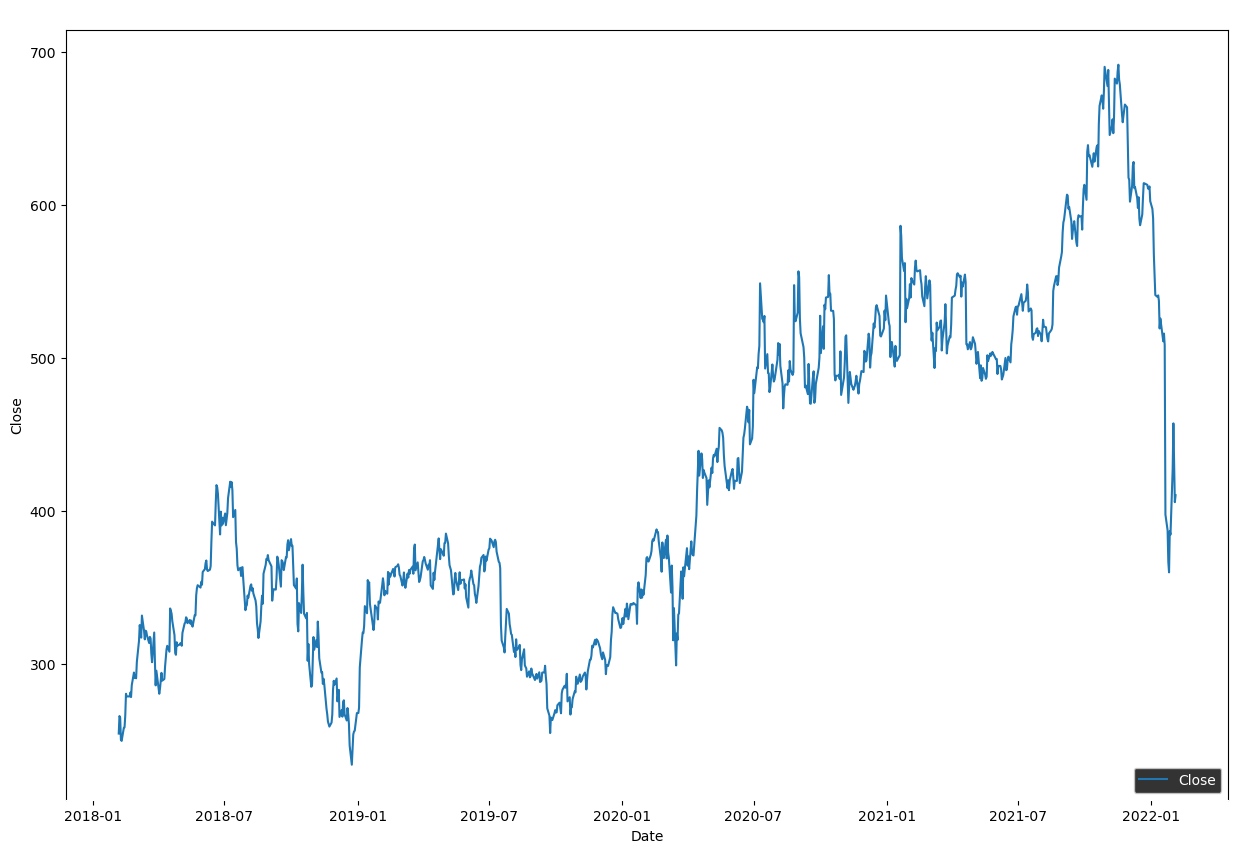

In [74]:
style()
plt.title('Closing Stock Price', color="white")
line = sns.lineplot(x ='Date', y = 'Close', data = df)
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

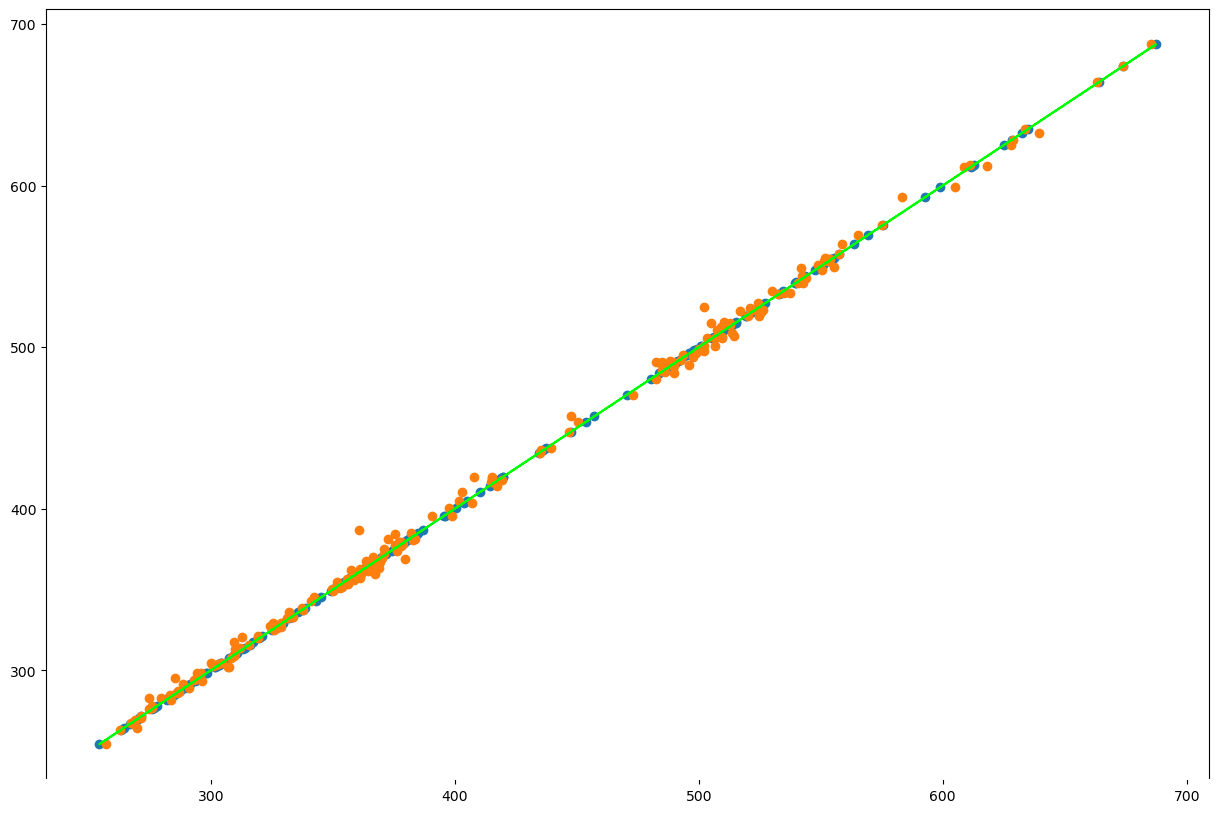

In [75]:
style()
plt.scatter(y_test,y_test)
plt.scatter(y_pred,y_test)
plt.plot(y_test,y_test,color = 'lime')

In [60]:
y['Predicted_Close'] = y_pred
y

,Date,Open,High,Low,Close,Adj Close,Volume,Predicted_Close
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600,375.371170
291,2019-04-03,369.260010,373.410004,366.190002,369.750000,369.750000,5368900,370.351389
94,2018-06-20,415.149994,419.470001,409.600006,416.760010,416.760010,16494600,414.947702
983,2021-12-30,612.989990,620.609985,611.239990,612.090027,612.090027,1625100,617.927777
37,2018-03-29,287.000000,295.350006,275.899994,295.350006,295.350006,19145500,285.160749
...,...,...,...,...,...,...,...,...
414,2019-09-27,266.179993,267.440002,260.390015,263.079987,263.079987,7328300,262.737049
875,2021-07-28,521.820007,524.469971,516.979980,519.299988,519.299988,2390500,520.262059
931,2021-10-15,638.000000,639.419983,625.159973,628.289978,628.289978,4114400,628.921873
614,2020-07-15,516.299988,529.000000,510.179993,523.260010,523.260010,10066700,521.775642


C:\Users\DELL\AppData\Local\Temp\ipykernel_8740\3952155371.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = 'Date',y = 'Close',data = y,palette = 'r')


<Axes: xlabel='Date', ylabel='Close'>

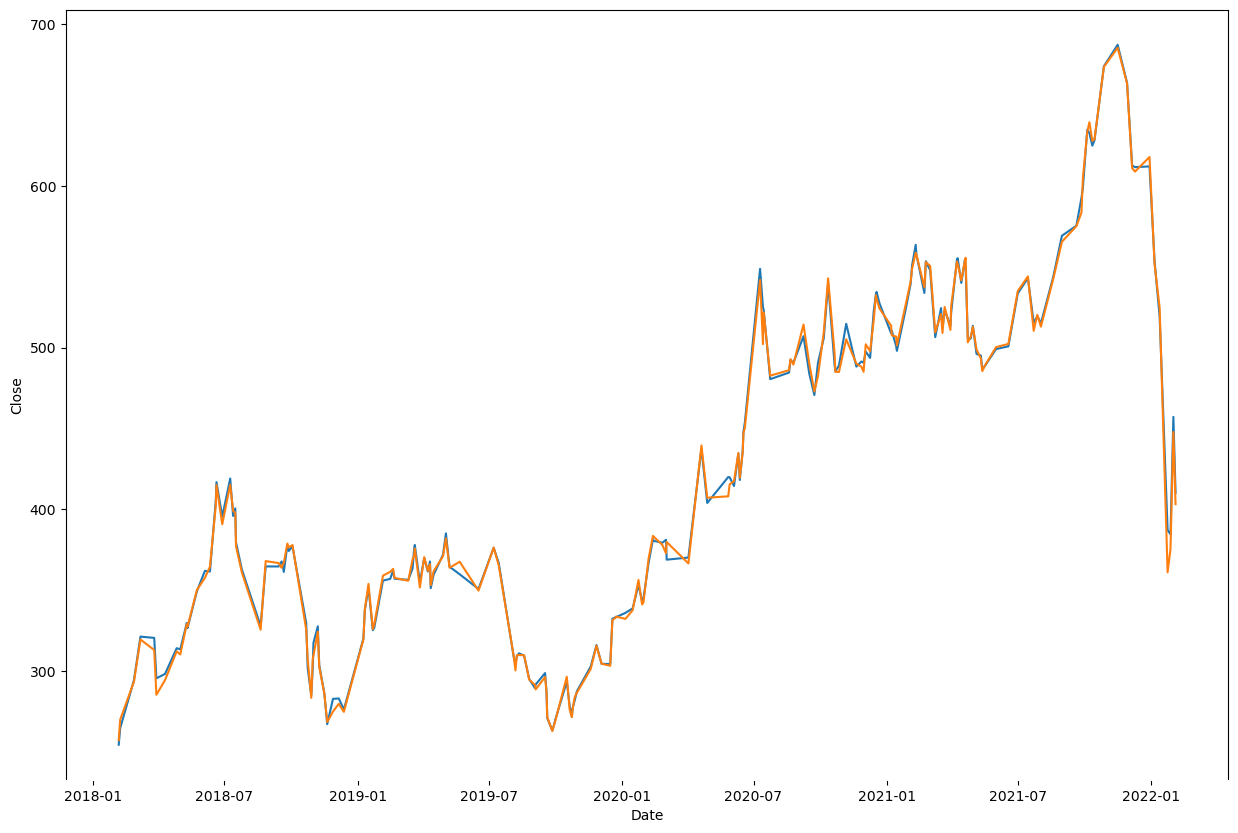

In [76]:
style()
sns.lineplot(x = 'Date',y = 'Close',data = y,palette = 'r')
sns.lineplot(x = 'Date',y = 'Predicted_Close',data = y)